Replicate https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1

but using "keras with tensorflow backend" instead of tensorflow directly

## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
import utils

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Using TensorFlow backend.


## Generate data

X [[ 0.17035095  0.74049265  0.40262799  0.22545548  0.00806665  0.5085561 ]
 [-0.21582214  1.35124141  1.61049687  1.61099792 -0.11424565  0.10366838]
 [ 0.23712038  1.46822702  1.90525812  1.99043525  0.50291566  1.15473966]
 [ 0.96662121  1.27597728  1.43229295  1.38864618  1.86578802  0.97447455]
 [-1.32446291  0.48016248  0.03760392 -0.12554987 -0.56454815 -0.29164656]
 [-0.81658069  0.9447089   0.74837237  0.59050675 -0.49339709  0.41076426]
 [ 0.39006419  0.4006574  -0.05820698 -0.21084477  0.02672942 -0.21423284]
 [ 0.68703981 -1.52482704 -0.88341612 -0.75207856 -0.560766   -1.28046408]
 [-0.63995264 -0.47516426 -0.71493767 -0.6867403  -0.54083014 -1.37349022]
 [-1.00989537 -1.17520826 -0.86941957 -0.74959778 -0.56755479 -0.88076692]]


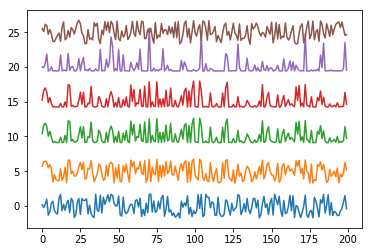

In [2]:
N=100000

# Try dataset from https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1
from sklearn.preprocessing import scale
def data1(n_samples:int=2000, n_features:int=5):
    # n_samples, n_features = 2000, 5
    X = np.random.uniform(0, 1, (n_samples, n_features))
    X[:, 2] = X[:, 1]**3
    X[:, 3] = X[:, 1]*X[:, 2]
    X[:, 4] = X[:,1]**2 * X[:, 0]**3
    X = scale(X)
    return X

X = data1(N,6)

print('X',X[0:10,:])

utils.myPlot(X)

## Normalize

X normalized [[  5.48811862e-01   7.15187693e-01   3.65817463e-01   2.61629018e-01
    8.54378343e-02   6.45900689e-01]
 [  4.37582607e-01   8.91772978e-01   7.09192683e-01   6.32439511e-01
    6.73342875e-02   5.28899705e-01]
 [  5.68043431e-01   9.25596931e-01   7.92987959e-01   7.33987714e-01
    1.58680851e-01   8.32629280e-01]
 [  7.78161216e-01   8.70011922e-01   6.58532537e-01   5.72931873e-01
    3.60400736e-01   7.80537813e-01]
 [  1.18261319e-01   6.39918645e-01   2.62047740e-01   1.67690023e-01
    6.84634951e-04   4.14664977e-01]
 [  2.64546401e-01   7.74232568e-01   4.64106320e-01   3.59327103e-01
    1.12157632e-02   6.17641641e-01]
 [  6.12095765e-01   6.16931406e-01   2.34810437e-01   1.44862685e-01
    8.82001264e-02   4.37035333e-01]
 [  6.97633516e-01   6.02176793e-02   2.18444903e-04   1.31559603e-05
    1.24443399e-03   1.28924961e-01]
 [  3.15420494e-01   3.63705814e-01   4.81138129e-02   1.74995293e-02
    4.19515748e-03   1.02043062e-01]
 [  2.08866062e-01   1.6

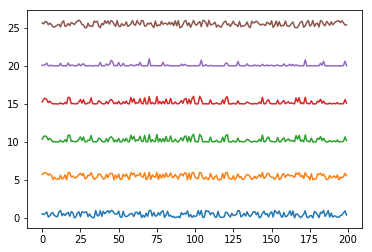

In [3]:
X_norm = utils.myNorm3(X)
print("X normalized",X_norm[0:10,:])

# plot
utils.myPlot(X_norm)

## PCA / AE with successive dimensionality reductions

PCA
n_components =  1
err pca =  0.68289393719
autoencoder


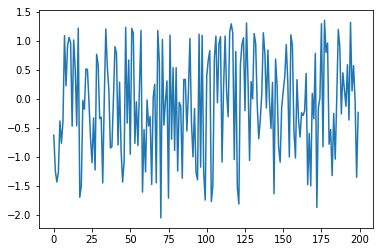

AE mse =  0.377555615765
PCA
n_components =  2
err pca =  0.483592419388
autoencoder


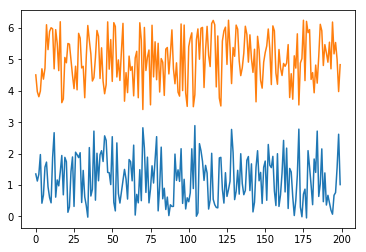

AE mse =  0.25882712065
PCA
n_components =  3
err pca =  0.259222490267
autoencoder


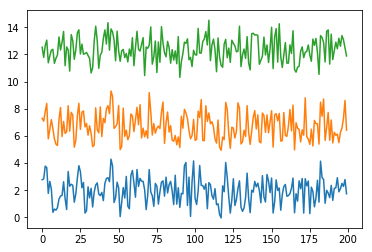

AE mse =  0.0533292526929
PCA
n_components =  4
err pca =  0.157136806794
autoencoder


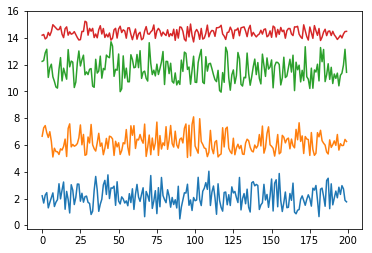

AE mse =  0.0514389757472
PCA
n_components =  5
err pca =  0.0157351474534
autoencoder


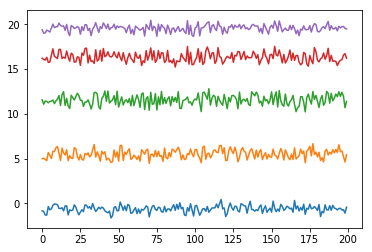

AE mse =  0.0502311142107
PCA
n_components =  6
err pca =  4.05100467136e-15
Explained variance ratio (cumsum) [ 0.53365587  0.76613837  0.9328037   0.97530802  0.99975241  1.        ]


AttributeError: 'list' object has no attribute 'shape'

In [5]:
X_pca = []
X_pca.append(None) # so that the index starts at 1
N_epochs = 25
for n_c_i in [x+1 for x in range(X.shape[1])]: # 'mle'
    print("PCA")
    pca = PCA(n_components=n_c_i, random_state=888, svd_solver = 'full')
    X_pca.append(pca.fit_transform(X))
    # print("X_pca_0",X_pca_0[0:10,:])
    # print("")
    # print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))
    # print("")
    print("n_components = ",n_c_i)
    utils.pca_err(X, X_pca[n_c_i])
    if n_c_i == X.shape[1]:
        print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))
        # plot
        utils.myPlot(X_pca[n_c_i])
        
    # train autoencoder
    print("autoencoder")
    autoencoder, encoder = utils.buildNetwork(X_norm.shape[1], encoding_dim_ae = n_c_i)
    utils.ae_fit_encode_plot_mse(X_norm, autoencoder, encoder, N_epochs, verbose=0)

PCA
n_components =  6
err pca =  4.05100467136e-15
Explained variance ratio (cumsum) [ 0.53365587  0.76613837  0.9328037   0.97530802  0.99975241  1.        ]


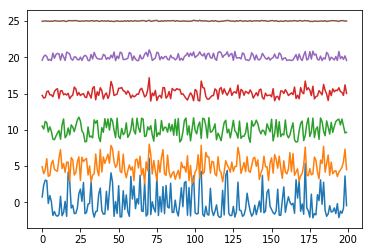

autoencoder


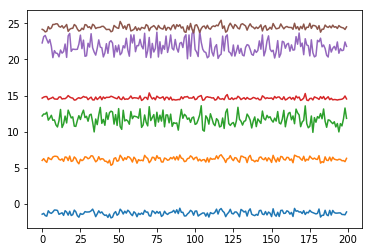

AE mse =  0.0508080119755


In [7]:
# just rerun to get around error above without losing results